### 2 ) Developing deep learning model for fruit image classification using CNN and VGG16 ###

Loading necessary packages

In [78]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np

Loading the datasets

In [79]:
train_dir = "C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\MY_data\\train"
test_dir = "C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\MY_data\\test"

img_width, img_height = (224,224)

Defining the batch size

In [80]:
batch_size = 32

Data Augmentation

In [81]:
augmentedTrain = ImageDataGenerator(
    rescale = 1./255.0,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)

In [82]:
augmentedTest = ImageDataGenerator(
    rescale = 1./255.0
)

Inference: By performing data augmentation, the model can understand a different patterns of the images.

Defining training and testing generators

In [83]:
trainGenerators = augmentedTrain.flow_from_directory(
    train_dir,
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 2301 images belonging to 10 classes.


Inference: Defined the train generators, founded 2301 images belonging to 10 classes.

In [84]:
testGenerators = augmentedTest.flow_from_directory(
    test_dir,
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
    
)

Found 1025 images belonging to 10 classes.


Inference: Defined the test generators, founded 1025 images belonging to 10 classes.

Checking the class indices

In [85]:
print("Class labels for training data: " , trainGenerators.class_indices)
print("Class labels for testing data: ", testGenerators.class_indices)

Class labels for training data:  {'Apple': 0, 'Banana': 1, 'avocado': 2, 'cherry': 3, 'kiwi': 4, 'mango': 5, 'orange': 6, 'pinenapple': 7, 'strawberries': 8, 'watermelon': 9}
Class labels for testing data:  {'apple': 0, 'avocado': 1, 'banana': 2, 'cherry': 3, 'kiwi': 4, 'mango': 5, 'orange': 6, 'pinenapple': 7, 'stawberries': 8, 'watermelon': 9}


Buidling the CNN Model

In [18]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(3,3),
    Dropout(0.5),
    Conv2D(64,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(3,3),
    Dropout(0.5),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(3,3),
    Dropout(0.5),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation = 'softmax') # softmax is used since it is multi classification
])

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Compiling the Model

In [19]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

Fitting the Model

In [20]:
buildingCNN = model.fit(trainGenerators,validation_data=testGenerators,epochs=5)

Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.1616 - loss: 3.5649 - val_accuracy: 0.1024 - val_loss: 20.0549
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.2916 - loss: 1.8868 - val_accuracy: 0.1024 - val_loss: 21.7023
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.3727 - loss: 1.6509 - val_accuracy: 0.1024 - val_loss: 18.3457
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.4513 - loss: 1.4810 - val_accuracy: 0.0917 - val_loss: 14.3955
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.4967 - loss: 1.3987 - val_accuracy: 0.1005 - val_loss: 13.2519


Inference: The training and validation accuracy is not that much good, we need to train the model for more number of epochs.

Evaluating the model

In [26]:
evaluateCNN = model.evaluate(testGenerators)
evaluateTrainCNN = model.evaluate(trainGenerators)

33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.0959 - loss: 13.4943
72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 600ms/step - accuracy: 0.1366 - loss: 13.0846


Visualizing training and validation loss

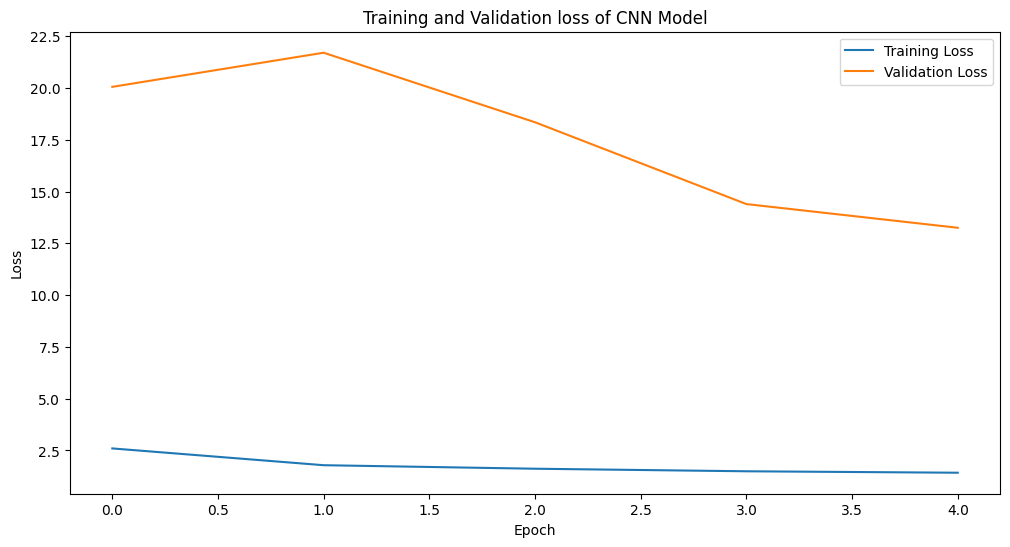

In [27]:
plt.figure(figsize=(12,6))
plt.plot(buildingCNN.history['loss'], label = 'Training Loss')
plt.plot(buildingCNN.history['val_loss'], label = 'Validation Loss')
plt.title("Training and Validation loss of CNN Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Visualizing training and validation accuracy

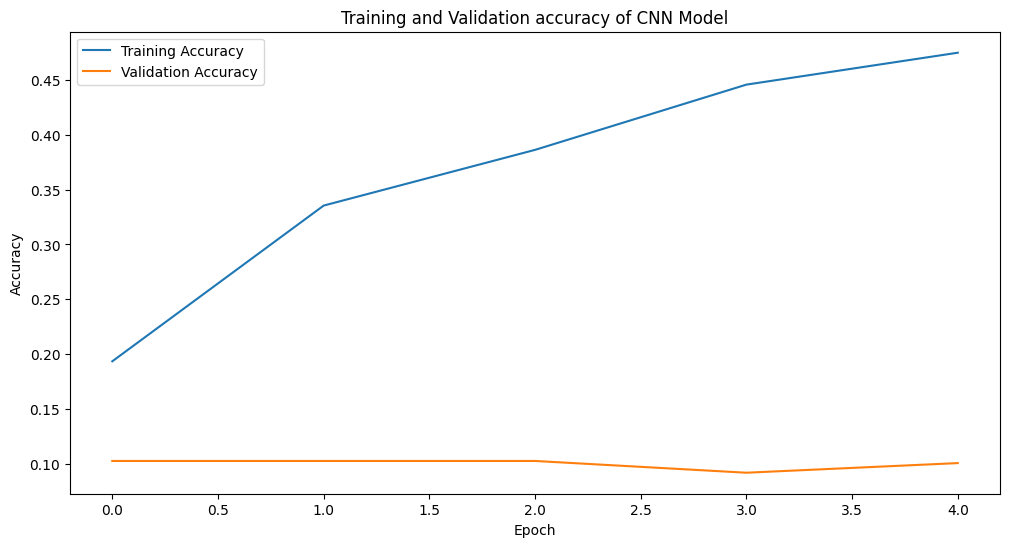

In [28]:
plt.figure(figsize=(12,6))
plt.plot(buildingCNN.history['accuracy'], label = 'Training Accuracy')
plt.plot(buildingCNN.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Training and Validation accuracy of CNN Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Time for Predictions

In [29]:
model.save('cnnModel.h5')

In [31]:
cnn = load_model('cnnModel.h5')

In [63]:
imgPath = "C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\MY_data\\predict\\img_421.jpeg"

In [64]:
randomPath = imgPath
img = image.load_img(randomPath,target_size=(224,224))

In [65]:
customCnn = image.img_to_array(img) / 255.0
customCnn = np.expand_dims(customCnn,axis=0)

In [66]:
predictions = cnn.predict(customCnn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Predictions for a random image

In [67]:
class_labels = {0: 'Apple', 1: 'Banana', 2: 'Avocado', 3: 'Cherry', 4: 'Kiwi', 5: 'Mango', 6: 'Orange', 7: 'Pineapple', 8: 'Strawberries', 9: 'Watermelon'}

predicted_class_index = np.argmax(predictions)

predicted_fruit_name = class_labels[predicted_class_index]

print('Predicted Fruit:', predicted_fruit_name)

Predicted Fruit: Banana


Inference: Model not predicted the image correctly, we need to improve the model. This is because, the model is not trained on a larger number of epochs.

Building VGG16 Model

In [69]:
base_model = VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False) # transfer learning
vggModel = Sequential([
    base_model,
    Flatten(),
    Dense(512,activation='relu'),
    Dense(10,activation='softmax')
])

In [71]:
# Freezing the layers of pretrained model

for layer in base_model.layers:
    layer.trainable = False

In [72]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Compiling the Model

In [73]:
vggModel.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

Fitting the Model

In [88]:
buildVGG = vggModel.fit(trainGenerators,validation_data=testGenerators,epochs=3)

Epoch 1/3
72/72 ━━━━━━━━━━━━━━━━━━━━ 719s 10s/step - accuracy: 0.4122 - loss: 2.3299 - val_accuracy: 0.5278 - val_loss: 2.1885
Epoch 2/3
72/72 ━━━━━━━━━━━━━━━━━━━━ 762s 11s/step - accuracy: 0.7226 - loss: 0.8513 - val_accuracy: 0.5707 - val_loss: 2.4317
Epoch 3/3
72/72 ━━━━━━━━━━━━━━━━━━━━ 795s 11s/step - accuracy: 0.7647 - loss: 0.6965 - val_accuracy: 0.5376 - val_loss: 2.7575


Inference: Training accuracy is increasing and the loss is decreasing, that's a good sign. But the validation accuracy and val loss is not good. This is because we need to train the model for more epochs.

Visualizing training and validation loss


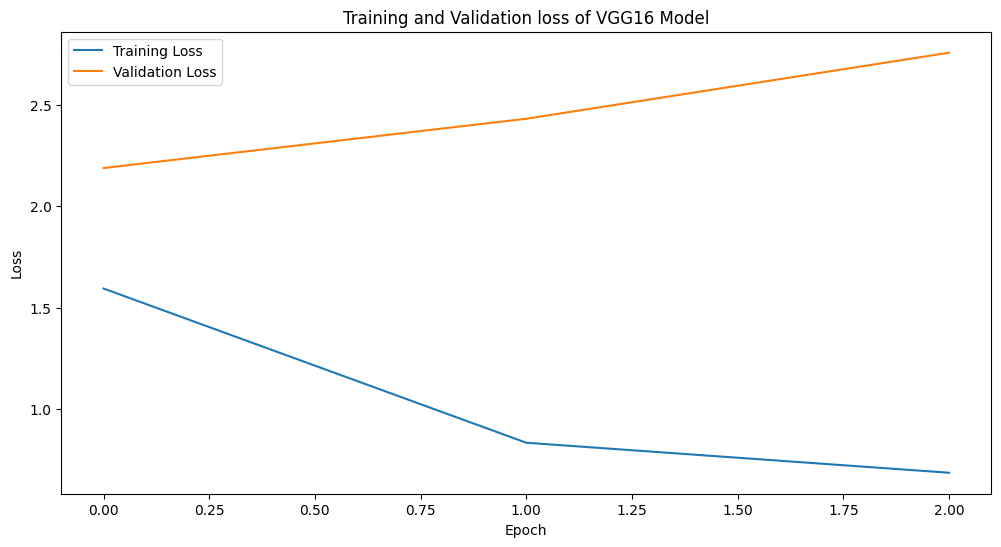

In [89]:
plt.figure(figsize=(12,6))
plt.plot(buildVGG.history['loss'], label = 'Training Loss')
plt.plot(buildVGG.history['val_loss'], label = 'Validation Loss')
plt.title("Training and Validation loss of VGG16 Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Visualizing training and validation accuracy


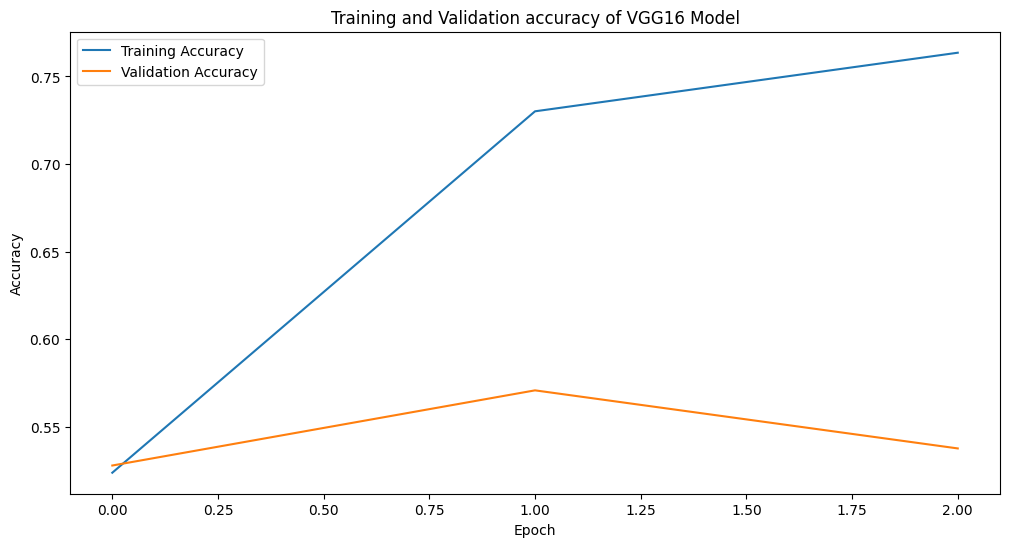

In [90]:
plt.figure(figsize=(12,6))
plt.plot(buildVGG.history['accuracy'], label = 'Training Accuracy')
plt.plot(buildVGG.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Training and Validation accuracy of VGG16 Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Conclusion

 When Comparing to CNN, VGG16 is performing somewhat good. But more epochs are needed to train the model, so that it can identify intricate patterns. Thus developing deep learning model for fruit classification is implemented successfully.